### 사전준비

In [1]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [3]:
# 머신러닝 패키지 import
import statsmodels.api as sm # 안쓸껄??
import sklearn as sk

# 마켓과 머신러닝 학습

## 생선분류 문제

#### 일단 고기 종류!!
- 이름이 익숙하지 않습니다
    - Bream : 도미(감성돔과 식용어)
    - Roach : 유럽산 잉어과(바퀴벌레 아님)
    - Whitefish : 송어(송어과)
    - Parkki : 박끼는 흔히 부르는 이름이고, Abramis bjoerkna 어종을 이렇게 부릅니다. 비요르나인데 그냥 박끼라고 하죠
    - Perch : 농어
    - Pike : 강꼬치고기
    - Smelt : 빙어 

#### 도미 데이터 준비

In [4]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

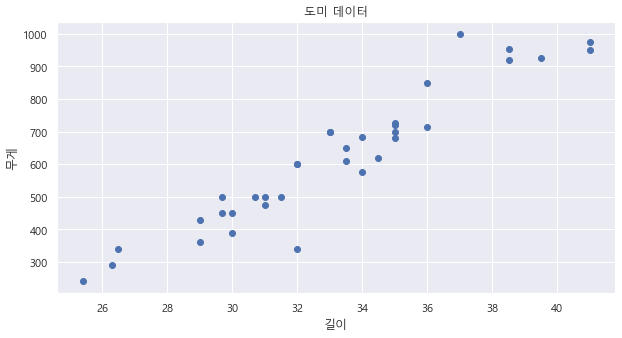

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.scatter(bream_length, bream_weight)
plt.title('도미 데이터')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

In [6]:
bream_length_df = pd.DataFrame({'length' : bream_length})
bream_length_df.tail()


,length
30,38.5
31,38.5
32,39.5
33,41.0
34,41.0


In [7]:
bream_weight_df = pd.DataFrame({'weight' : bream_weight})
bream_weight_df.tail()

,weight
30,920.0
31,955.0
32,925.0
33,975.0
34,950.0


In [8]:
bream_df = pd.concat([bream_length_df, bream_weight_df], axis='columns')
bream_df.tail()

,length,weight
30,38.5,920.0
31,38.5,955.0
32,39.5,925.0
33,41.0,975.0
34,41.0,950.0


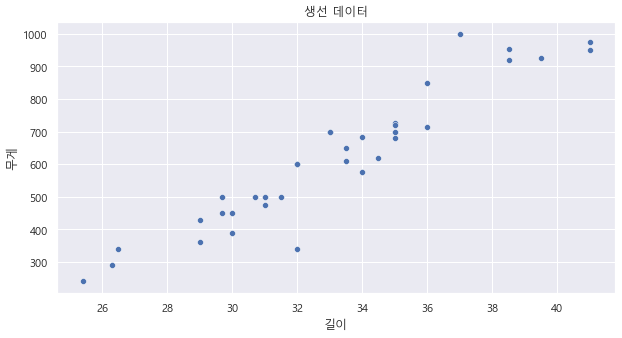

In [10]:
plt.figure(figsize=(10, 5))
a = sns.scatterplot(data=bream_df, x='length', y='weight')
plt.title('생선 데이터')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

#### 빙어 데이터

In [11]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

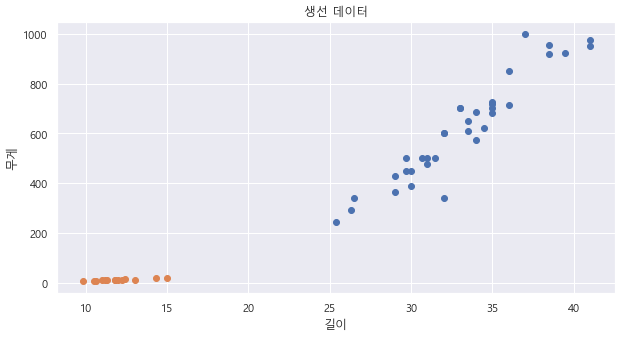

In [12]:
plt.figure(figsize=(10, 5))
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.title('생선 데이터')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

In [13]:
smelt_length_df = pd.DataFrame({'length' : smelt_length})
smelt_length_df.tail()

,length
9,12.2
10,12.4
11,13.0
12,14.3
13,15.0


In [14]:
smelt_weight_df = pd.DataFrame({'weight' : smelt_weight})
smelt_weight_df.tail()

,weight
9,12.2
10,13.4
11,12.2
12,19.7
13,19.9


In [15]:
smelt_df = pd.concat([smelt_length_df, smelt_weight_df], axis='columns')
smelt_df.tail()

,length,weight
9,12.2,12.2
10,12.4,13.4
11,13.0,12.2
12,14.3,19.7
13,15.0,19.9


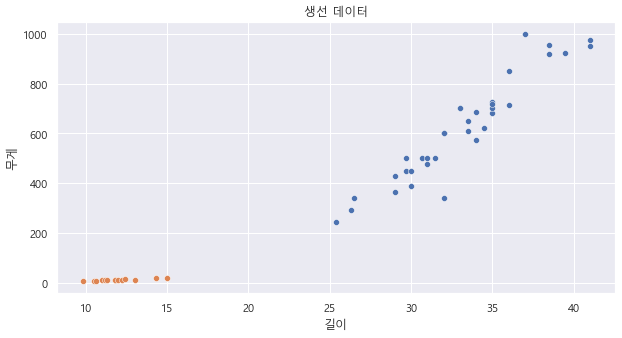

In [17]:
plt.figure(figsize=(10, 5))
a = sns.scatterplot(data=bream_df, x='length', y='weight')
sns.scatterplot(data=smelt_df, x='length', y='weight')
# a.grid(color='gray', linestyle='--', linewidth=0.5)
# a.grid()
plt.title('생선 데이터')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

### 첫번째 머신러닝

In [18]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight

In [19]:
fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [20]:
# one-hot encoding
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
kn = KNeighborsClassifier()

kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [23]:
kn.score(fish_data, fish_target)

1.0

#### k-최근접 이웃 알고리즘

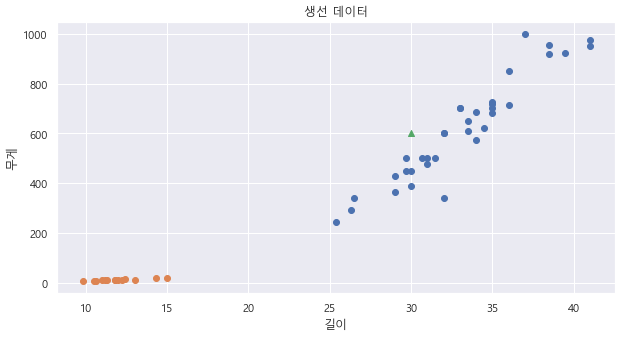

In [24]:
plt.figure(figsize=(10, 5))
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')

plt.title('생선 데이터')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

In [25]:
# 예측
kn.predict([[30, 600]])

array([1])

In [26]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [27]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
kn49 = KNeighborsClassifier(n_neighbors=49)

In [29]:
kn49.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=49)

In [30]:
kn49.score(fish_data, fish_target)

0.7142857142857143

In [31]:
print(35/49)

0.7142857142857143


#### 확인문제

In [32]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
    # 최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(fish_data, fish_target)
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939
